# Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the Dataset

In [16]:
athletes = pd.read_csv(r"./Data/athlete_events.csv")
noc = pd.read_csv(r"./Data/noc_regions.csv")

# Creating a copy of DataFrame

In [17]:
ath = athletes.copy()
nat = noc.copy()

# Data Exploration

In [18]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [20]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [21]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [22]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [23]:
ath.shape

(271116, 15)

In [24]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Data Cleaning and Manipulation

1. Add a new column "region" to the ath DataFrame. And the region column should have regions according to the elements of the 'NOC' columns of the 'nat' DataFrame.

In [25]:
ath.iloc[[578]]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN


In [26]:
nat[nat.region=='Singapore']

,NOC,region,notes
178,SIN,Singapore,NaN


In [27]:
# The ISO code of Singapore in nat Dataframe is wrong.
# Replaced it with right one to avoid index out of range ie. empty list error.
nat.NOC = nat.NOC.replace(['SIN'],'SGP')

In [28]:
# Method 1 - using a lambda function to replace eeach value of noc with corresponding region column of nat DataFrame
ath.NOC.apply(lambda da: nat[nat.NOC == da ]['region'].values[0]) 

0               China
1               China
2             Denmark
3             Denmark
4         Netherlands
             ...     
271111         Poland
271112         Poland
271113         Poland
271114         Poland
271115         Poland
Name: NOC, Length: 271116, dtype: object

In [29]:
#Method 2 - can also use the map method. Another alternative is merge method.
#Method 2 is considerably faster.
regions = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7,'regions',regions)
ath.drop('NOC',axis=1,inplace=True)

In [30]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,regions,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


2. Handling the null values of the columns - 'Age', 'Height' and 'Weight' 

In [31]:
ath['Age'].fillna(round(ath.Age.mean()), inplace = True)

In [32]:
ath['Height'].fillna(round(ath.Height.mean()), inplace = True)

In [33]:
ath['Weight'].fillna(round(ath.Weight.mean()), inplace = True)

In [34]:
ath.isnull().sum()

ID              0
Name            0
Gender          0
Age             0
Height          0
Weight          0
Team            0
regions        21
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
dtype: int64

3. List out all the values of region column where the values are null.

In [35]:
ath[ath['regions'].isnull()]

,ID,Name,Gender,Age,Height,Weight,Team,regions,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
61080,31292,Fritz Eccard,M,26.0,175.0,71.0,Unknown,NaN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,NaN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
130721,65813,A. Laffen,M,26.0,175.0,71.0,Unknown,NaN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


4. Handling the null values in the column 'Medals'

In [36]:
#Unique values in Medal column
ath.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [37]:
# Count of each unique value
ath.Medal.value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [38]:
# Replacing
# NaN - 0, Gold - 1 , Silver - 2, Bronze - 3

ath['Medal'].replace([np.nan,'Gold','Silver','Bronze'],[0,1,2,3],inplace=True)

In [39]:
ath.isnull().sum()

ID          0
Name        0
Gender      0
Age         0
Height      0
Weight      0
Team        0
regions    21
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

5. Dropping off the unwanted columns - regions, Games

In [40]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,regions,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


In [41]:
ath.drop(['regions','Games'],axis=1,inplace=True)

6. Remove the unwanted phrases from the Event column

In [42]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [43]:
# Creating a list by removing unwanted phrases from Event column
Events = [re.sub(f'{ath.Sport[i]}\s','',ath.Event[i]) for i in range(len(ath))]

In [44]:
# Using the list to create a series and assigning to the event column
ath.Event = pd.Series(Events)

7. Changing the dtype of the 'Age' column as int

In [45]:
ath['Age'] = ath['Age'].astype(int)

In [46]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int32  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 25.9+ MB


# Exporting the DataFrame

In [47]:
ath.to_csv("Atheletes_Dataset.csv")

# Data Analysis

1. Show the relationship between Height and weight.

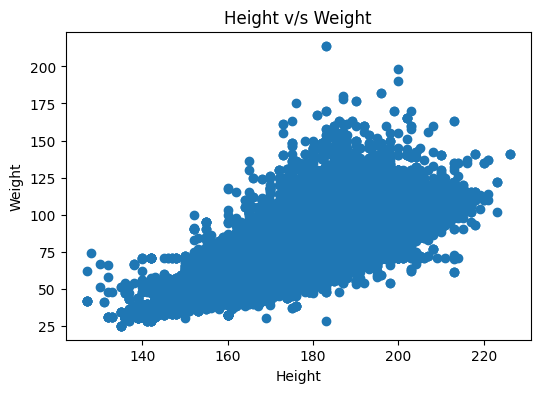

In [48]:
plt.figure(figsize=(6,4))
plt.scatter(ath['Height'],ath['Weight'])
plt.title("Height v/s Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

<h3>Conclusion</h3>
<p>From the above scatterplot we can conclude a positive correlation between the height and weight. We can see that increase in height leads to increase in weight, also there are more athletes that have a above average height.</p>

2. Find out how many male and female had participated the olympics during 1896 to 2016

In [49]:
ath.Gender.value_counts().to_dict()

{'M': 196594, 'F': 74522}

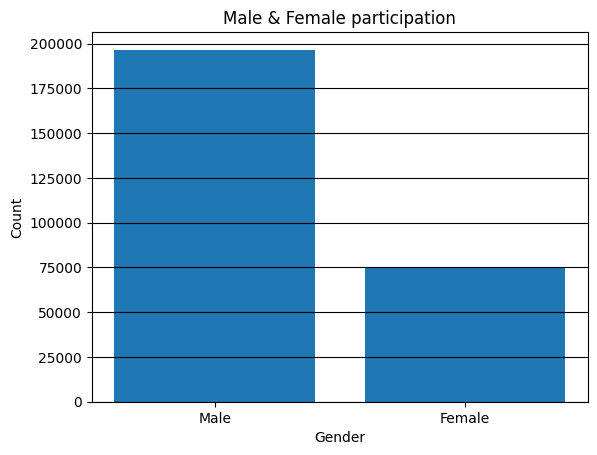

In [60]:
plt.bar(["Male","Female"],ath.Gender.value_counts().to_list())
plt.title('Male & Female participation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y',color='k')
plt.show()

<h3>Conclusion</h3>
<p>From the above bar graph we can conclude that a larger number of male players have participated in olympics compared to female players.</p>

3. How many Male and Femalehave participated in summer and winter olympics

In [51]:
import plotly.express as px
import plotly.io as pio

In [59]:
fig = px.histogram(ath, x= ath.Season,color=ath.Gender,barmode='group',title='Season-Gender Participation Count')
pio.renderers.default = 'iframe'
fig.show()

<h3>Conclusion</h3>
<p>From the above graph we can see a higher participation in summer olympics compared to winter olympics.</p>

4. Name the top 5 countries who have the most medals

In [53]:
Medal_count = ath[(ath.Medal == 1) |(ath.Medal == 2)|(ath.Medal == 3)]['Medal'].groupby(ath.Team).count().sort_values(ascending=False).head()

In [54]:
fig = px.bar(Medal_count,title='Top 5 Countries in Olympics')
fig.show()

<h3>Conclusion</h3>
<p>From the above graph we can see that US has the earned the highest number of medals followed by Soviet Union, Germany, Great Britain,and France.</p>

5. Show the Male and Female participation count through out the past organized Olympics.

In [55]:
fig = px.histogram(ath,x=ath.Year,color=ath.Gender,title='Male & Female Participation Count')
fig.show()

<h3>Conculsion</h3>
<p>In the above graph we can see a gradual increase in female participation throughout the years.</p>

6. Show the medal count for No medal - 0, gold - 1, silver - 2 and bronze - 3 throughout the age group.

In [58]:
fig = px.histogram(ath,x=ath.Age,color=ath.Medal,title='Medal Count throughout the age group')
fig.show()

<h3>Conclusion</h3>
<p>In the above graph we can see more number of medals are earned by athletes in the age group 20-30, with a sharp curve on the left which represents a sudden increase of medals in the age group 10-20, while a smoother curve to the right which represents a gradual decrease in the medal count with increasing age of the athletes.</p>

7. Show the correlation between the columns in the athletes DataFrame.

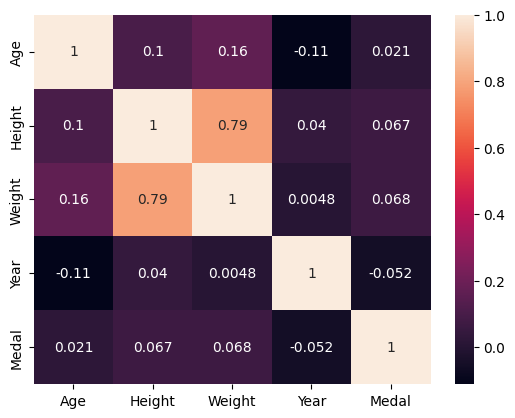

In [57]:
sns.heatmap(ath[['Age', 'Height', 'Weight', 'Year', 'Medal']].corr(),annot=True)
plt.show()

<h3>Conclusion</h3>
<p>In the above heatmap we can see a higher correlation between height and weight, while the lowest correlation between age of the athlete and year in which the olympic event was held.</p>